In [49]:
!cd ../src

zsh:cd:1: no such file or directory: ../src


In [50]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
%autoreload 2

In [52]:
import numpy as np
import spacy
import matplotlib.pyplot as plt

In [53]:
nlp = spacy.load("en_core_web_lg")

### Parameters


In [54]:
# Experiment
group = "free"

colors = {
    "controlled": "#97121f",
    "free": "#1271d1",
    "combined": "#0b4539"
}

font_size = 16

### Absolute word frequencies
Without punctuation and stopwords.
Lemmatized.

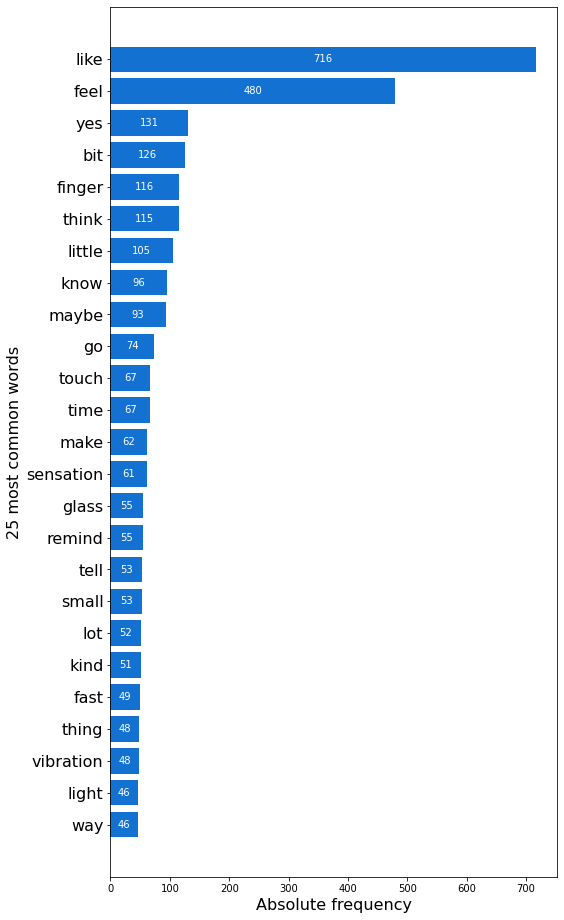

In [55]:
from collections import Counter
from src.data import get_full_text
from src.utils import plots_dir

text = get_full_text(group)

doc = nlp(text)

# Remove punctuation, stop words and lemmatize
lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop]

most_common = Counter(lemmas).most_common(25)

y = np.arange(len(most_common))
x = [v for k, v in most_common]
labels = [k for k, v in most_common]

fig, ax = plt.subplots(figsize=(8,16))
container = ax.barh(y, x, align="center", color=colors[group])
ax.set_yticks(y, labels=labels, fontsize=font_size)
ax.set_xlabel("Absolute frequency", fontsize=font_size)
ax.set_ylabel("25 most common words", fontsize=font_size)
ax.bar_label(container, label_type='center', color="white")
ax.invert_yaxis()
plt.savefig(plots_dir() / f"{group}_1_absolute_word_frequencies.png",
            bbox_inches='tight',
            transparent=True,
            pad_inches=0,
            dpi=300)

### Nouns and adjectives
Without punctuation and stopwords.
Lemmatized.
Only nouns and adjectives.

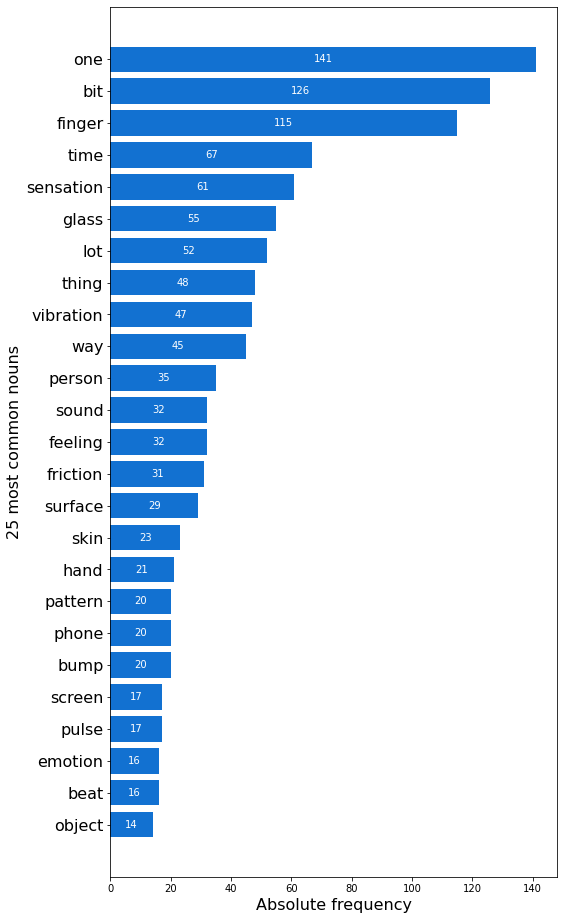

In [56]:
from collections import Counter
from src.data import get_full_text
from src.utils import plots_dir

text = get_full_text(group)

doc = nlp(text)

nouns = [token.lemma_.lower() for token in doc if token.pos_ == "NOUN"]
nouns = [noun for noun in nouns if noun != "onomatopoeia"]

most_common_nouns = Counter(nouns).most_common(25)

y = np.arange(len(most_common_nouns))
x = [v for k, v in most_common_nouns]
labels = [k for k, v in most_common_nouns]

fig, ax = plt.subplots(figsize=(8,16))
container = ax.barh(y, x, align="center", color=colors[group])
ax.set_yticks(y, labels=labels, fontsize=font_size)
ax.set_xlabel("Absolute frequency", fontsize=font_size)
ax.set_ylabel("25 most common nouns", fontsize=font_size)
ax.bar_label(container, label_type='center', color="white")
ax.invert_yaxis()
plt.savefig(plots_dir() / f"{group}_1_absolute_word_frequencies_nouns.png",
            bbox_inches='tight',
            transparent=True,
            pad_inches=0,
            dpi=300)

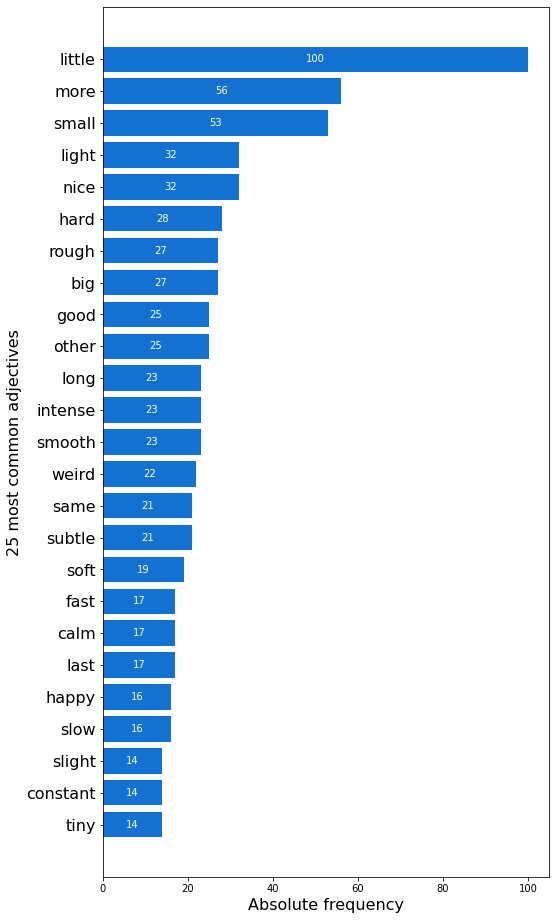

In [57]:
from collections import Counter
from src.data import get_full_text
from src.utils import plots_dir

text = get_full_text(group)

doc = nlp(text)

adjectives = [token.lemma_.lower() for token in doc if token.pos_ == "ADJ"]

most_common_adjectives = Counter(adjectives).most_common(25)

y = np.arange(len(most_common_adjectives))
x = [v for k, v in most_common_adjectives]
labels = [k for k, v in most_common_adjectives]

fig, ax = plt.subplots(figsize=(8,16))
container = ax.barh(y, x, align="center", color=colors[group])
ax.set_yticks(y, labels=labels, fontsize=font_size)
ax.set_xlabel("Absolute frequency", fontsize=font_size)
ax.set_ylabel("25 most common adjectives", fontsize=font_size)
ax.bar_label(container, label_type='center', color="white")
ax.invert_yaxis()
plt.savefig(plots_dir() / f"{group}_1_absolute_word_frequencies_adjectives.png",
            bbox_inches='tight',
            transparent=True,
            pad_inches=0,
            dpi=300)